# Classical Natural Language Processing (NLP) - Logistic Regression for Classification


In [1]:
input_directory="F:/Downloads/instrument_master/"
#input_file_name="instrument_master-sp500-20200808.psv"
input_file_name="instrument_master-r3000-20200808.psv"


In [2]:
import pandas as pd
import numpy as np

# graphics
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# inline matplotlib
%matplotlib inline

In [3]:
instrument_master=pd.read_csv(input_directory+input_file_name,sep='|')

In [97]:
instrument_master.head().style

,assetid,symbol,securityname,business_summary,gics_level_1,gics_level_2,gics_level_3,gics_level_4,currency,domicile,exchange_name,exchange_name_full,base_type,subtype_l1,subtype_l2,subtype_l3,first_quoted_date,last_quoted_date,last_price_update_date,ticker,index_family_code,as_of_date,as_of_time,market_cap,market_cap_date
0,131684,A,Agilent Technologies Inc Common,"Agilent Technologies, Inc. provides application focused solutions that include instruments, software, services and consumables for the entire laboratory workflow. The Company serves the life sciences, diagnostics and applied chemical markets. It has three business segments: life sciences and applied markets business, diagnostics and genomics business, and Agilent CrossLab business. Its life sciences and applied markets business segment offers instruments and software that enable customers to identify, quantify and analyze the physical and biological properties of substances and products, as well as enable customers in the clinical and life sciences research areas to interrogate samples at the molecular level. Its diagnostics and genomics business segment includes the reagent partnership, pathology, companion diagnostics, genomics and the nucleic acid solutions businesses. Its Agilent CrossLab business segment spans the entire lab with its consumables and services portfolio.",Health Care,"Pharmaceuticals, Biotechnology & Life Sciences",Life Sciences Tools & Services,Life Sciences Tools & Services,USD,United States Of America,NYSE,New York Stock Exchange,Stock Market,Equity,Operating/Holding Company,nan,1999-11-18,nan,nan,r3000,$RUA,2020-08-08,23:29:47,30192.300000,2020-08-07
1,2214917,AA,Alcoa Corp Common,"Alcoa Corporation (Alcoa) is engaged in the production of bauxite, alumina and aluminum of various cast and rolled products. The Company�s operations consist of three reportable business segments: Bauxite, Alumina, and Aluminum. The Bauxite and Alumina segments primarily consist of a series of affiliated operating entities held in Alcoa World Alumina and Chemicals (AWAC), which is a joint venture between Alcoa Corporation and Alumina Limited. The Aluminum segment consists of the Company�s aluminum smelting, casting, and rolling businesses, along with the energy production business. Its Bauxite segment consists of the Company�s global bauxite mining operations. The Company�s Alumina segment consists of the Company�s worldwide refining system, which processes bauxite into alumina. The Aluminum segment consists of its worldwide smelting and casthouse system, a rolling mill in the United States, and a portfolio of energy assets in Brazil, Canada, and the United States.",Materials,Materials,Metals & Mining,Aluminum,USD,United States Of America,NYSE,New York Stock Exchange,Stock Market,Equity,Operating/Holding Company,nan,2016-10-18,nan,nan,r3000,$RUA,2020-08-08,23:29:47,2727.500000,2020-08-07
2,919693,AAL,American Airlines Group Inc Common,"American Airlines Group Inc. is a holding company. The Company's primary business activity is the operation of a network air carrier, providing scheduled air transportation for passengers and cargo. The Company operates through American segment, which provides air transportation for passengers and cargo. The Company's cargo division provides a range of freight and mail services with facilities and interline connections available across the globe. Together with its regional airline subsidiaries and third-party regional carriers operating as American Eagle, its airline operated an average of nearly 6,700 flights per day to nearly 350 destinations in more than 50 countries, principally from its hubs in Charlotte, Chicago, Dallas/Fort Worth, Los Angeles, Miami, New York, Philadelphia, Phoenix and Washington, District of Columbia, as of December 31, 2016. In the fiscal year ended December 31, 2016, approximately 199 million passengers boarded its mainline and regional flights.",Industrials,Transportation,Airlines,Airlines,USD,United State

In [5]:
instrument_master_sp500=instrument_master.sort_values(by='market_cap',ascending=False)

In [6]:
market_cap_by_gics_l1=instrument_master_sp500.pivot_table(index=['gics_level_1'],values=['market_cap'],aggfunc=np.sum,margins=True)

In [7]:
market_cap_by_gics_l1['market_cap_percent']=market_cap_by_gics_l1['market_cap'].divide(market_cap_by_gics_l1['market_cap'].loc['All'],axis=0)

In [8]:
market_cap_by_gics_l1.style.format({'market_cap': "{:.0f}", 'market_cap_percent': '{:.2%}'})

,market_cap,market_cap_percent
gics_level_1,,
Communication Services,3778674,10.49%
Consumer Discretionary,4394108,12.20%
Consumer Staples,2484328,6.90%
Energy,826303,2.29%
Financials,3607715,10.02%
Health Care,5117002,14.21%
Industrials,3140074,8.72%
Information Technology,9490525,26.35%
Materials,983535,2.73%


In [9]:
market_cap_by_gics_l2=instrument_master_sp500.pivot_table(index=['gics_level_1','gics_level_2'],values=['market_cap'],aggfunc=np.sum,margins=True)

In [10]:
market_cap_by_gics_l2['market_cap_percent']=market_cap_by_gics_l2['market_cap'].divide(market_cap_by_gics_l1['market_cap'].loc['All'],axis=0)

In [96]:
#market_cap_by_gics_l2.style.format({'market_cap': "{:.0f}", 'market_cap_percent': '{:.2%}'})

In [12]:
market_cap_by_gics_l3=instrument_master_sp500.pivot_table(index=['gics_level_1','gics_level_2','gics_level_3'],values=['market_cap'],aggfunc=np.sum,margins=True)

In [13]:
market_cap_by_gics_l3['market_cap_percent']=market_cap_by_gics_l3['market_cap'].divide(market_cap_by_gics_l1['market_cap'].loc['All'],axis=0)

In [95]:
#market_cap_by_gics_l3.style.format({'market_cap': "{:.0f}", 'market_cap_percent': '{:.2%}'})

In [15]:
market_cap_by_gics_l4=instrument_master_sp500.pivot_table(index=['gics_level_1','gics_level_2','gics_level_3','gics_level_4'],values=['market_cap'],aggfunc=np.sum,margins=True)

In [16]:
market_cap_by_gics_l4['market_cap_percent']=market_cap_by_gics_l4['market_cap'].divide(market_cap_by_gics_l1['market_cap'].loc['All'],axis=0)

In [94]:
#market_cap_by_gics_l4.style.format({'market_cap': "{:.0f}", 'market_cap_percent': '{:.2%}'})

In [18]:
market_cap_by_exchange=instrument_master_sp500.pivot_table(index=['exchange_name_full'],values=['market_cap'],aggfunc=np.sum,margins=True)

In [19]:
market_cap_by_exchange['market_cap_percent']=market_cap_by_exchange['market_cap'].divide(market_cap_by_exchange['market_cap'].loc['All'],axis=0)

In [20]:
market_cap_by_exchange.style.format({'market_cap': "{:.0f}", 'market_cap_percent': '{:.2%}'})

,market_cap,market_cap_percent
exchange_name_full,,
Cboe BZX,9577,0.03%
NYSE American,31840,0.09%
Nasdaq,16152052,44.85%
New York Stock Exchange,19823675,55.04%
All,36017144,100.00%


In [21]:
market_cap_by_domicile=instrument_master_sp500.pivot_table(index=['domicile'],values=['market_cap'],aggfunc=np.sum,margins=True)

In [22]:
market_cap_by_domicile['market_cap_percent']=market_cap_by_domicile['market_cap'].divide(market_cap_by_domicile['market_cap'].loc['All'],axis=0)

In [23]:
market_cap_by_domicile.style.format({'market_cap': "{:.0f}", 'market_cap_percent': '{:.2%}'})

,market_cap,market_cap_percent
domicile,,
Bahamas,359,0.00%
Bermuda,108610,0.30%
Brazil,13608,0.04%
Canada,49934,0.14%
Cayman Islands,9307,0.03%
China,20119,0.06%
Czech Republic,1015,0.00%
Germany,973,0.00%
India,512,0.00%


In [24]:
# define package directory
packageDirectory="H:/dnokes/Documents/code/Python/"

In [25]:
import sys
# add package directory
sys.path.append(packageDirectory)

# import custom CaRMS Data Services packages
import nlp_utilities as nlpu


## Preprocessing

In [26]:
df=instrument_master[['business_summary','gics_level_1']]

df=df.copy()

df=nlpu.addWordsExcludeStopwords(df,inputField='business_summary',outputField='words')

df=nlpu.addLemmatizedWordsExcludeStopwords(df,inputField='business_summary',outputField='wordsLemmatized')

df=nlpu.addNWords(df,inputField='words',outputFields='nWords')

df=nlpu.addNSetWords(df,inputField='words',outputFields='nSetWords')

df=nlpu.addNWordsLemmatized(df,inputField='wordsLemmatized',outputFields='nWordsLemmatized')

df=nlpu.addNSetWordsLemmatized(df,inputField='wordsLemmatized',outputFields='nSetWordsLemmatized')


In [93]:
df.head().style

,index,business_summary,gics_level_1,words,wordsLemmatized,nWords,nSetWords,nWordsLemmatized,nSetWordsLemmatized,wordsLemmatizedBOW,wordsLemmatizedBOBW
0,2707,"Take-Two Interactive Software, Inc. is a developer, publisher and marketer of entertainment for consumers around the world. The Company develops and publishes products through its labels, Rockstar Games and 2K. It operates through publishing segment. It has a portfolio of software content for the hardware platforms in a range of genres, including action, adventure, family/casual, racing, role-playing, shooter, sports and strategy, which it distributes across the world. The Company's products are designed for console gaming systems, such as PlayStation 3 and PlayStation 4; Xbox 360 and Xbox One, and personal computers, including smartphones and tablets. Rockstar Games is the developer and publisher of Grand Theft Auto, as well as other franchises, including L.A. Noire, Max Payne, Midnight Club and Red Dead. 2K publishes owned and licensed titles across a range of genres. It has internal development studios in Canada, China, Czech Republic, the United Kingdom and the United States.",Communication Services,"['interactive', 'software', 'developer', 'publisher', 'marketer', 'entertainment', 'consumers', 'around', 'world', 'company', 'develops', 'publishes', 'products', 'labels', 'rockstar', 'games', 'operates', 'publishing', 'segment', 'portfolio', 'software', 'content', 'hardware', 'platforms', 'range', 'genres', 'including', 'action', 'adventure', 'racing', 'shooter', 'sports', 'strategy', 'distributes', 'across', 'world', 'company', 'products', 'designed', 'console', 'gaming', 'systems', 'playstation', 'playstation', 'xbox', 'xbox', 'one', 'personal', 'computers', 'including', 'smartphones', 'tablets', 'rockstar', 'games', 'developer', 'publisher', 'grand', 'theft', 'auto', 'well', 'franchises', 'including', 'noire', 'max', 'payne', 'midnight', 'club', 'red', 'dead', 'publishes', 'owned', 'licensed', 'titles', 'across', 'range', 'genres', 'internal', 'development', 'studios', 'canada', 'china', 'czech', 'republic', 'united', 'kingdom', 'united', 'states']","['interactive', 'software', 'developer', 'publisher', 'marketer', 'entertainment', 'consumer', 'around', 'world', 'company', 'develops', 'publishes', 'product', 'label', 'rockstar', 'game', 'operates', 'publishing', 'segment', 'portfolio', 'software', 'content', 'hardware', 'platform', 'range', 'genre', 'including', 'action', 'adventure', 'racing', 'shooter', 'sport', 'strategy', 'distributes', 'across', 'world', 'company', 'product', 'designed', 'console', 'gaming', 'system', 'playstation', 'playstation', 'xbox', 'xbox', 'one', 'personal', 'computer', 'including', 'smartphones', 'tablet', 'rockstar', 'game', 'developer', 'publisher', 'grand', 'theft', 'auto', 'well', 'franchise', 'including', 'noire', 'max', 'payne', 'midnight', 'club', 'red', 'dead', 'publishes', 'owned', 'licensed', 'title', 'across', 'range', 'genre', 'internal', 'development', 'studio', 'canada', 'china', 'czech', 'republic', 'united', 'kingdom', 'united', 'state']",87,70,87,70,"{'interactive': True, 'software': True, 'developer': True, 'publisher': True, 'marketer': True, 'entertainment': True, 'consumer': True, 'around': True, 'world': True, 'company': True, 'develops': True, 'publishes': True, 'product': True, 'label': True, 'rockstar': True, 'game': True, 'operates': True, 'publishing': True, 'segment': True, 'portfolio': True, 'content': True, 'hardware': True, 'platform': True, 'range': True, 'genre': True, 'including': True, 'action': True, 'adventure': True, 'racing': True, 'shooter': True, 'sport': True, 'strategy': True, 'distributes': True, 'across': True, 'designed': True, 'console': True, 'gaming': True, 'system': True, 'playstation': True, 'xbox': True, 'one': True, 'personal': True, 'computer': True, 'smartphones': True, 'tablet': True, 'grand': True, 'theft': True, 'auto': True, 'well': True, 'franchise': True, 'noire': True, 'max'

In [29]:
df=nlpu.shuffleDf(df,randomState=1234567890)

In [92]:
df.head().style

,index,business_summary,gics_level_1,words,wordsLemmatized,nWords,nSetWords,nWordsLemmatized,nSetWordsLemmatized,wordsLemmatizedBOW,wordsLemmatizedBOBW
0,2707,"Take-Two Interactive Software, Inc. is a developer, publisher and marketer of entertainment for consumers around the world. The Company develops and publishes products through its labels, Rockstar Games and 2K. It operates through publishing segment. It has a portfolio of software content for the hardware platforms in a range of genres, including action, adventure, family/casual, racing, role-playing, shooter, sports and strategy, which it distributes across the world. The Company's products are designed for console gaming systems, such as PlayStation 3 and PlayStation 4; Xbox 360 and Xbox One, and personal computers, including smartphones and tablets. Rockstar Games is the developer and publisher of Grand Theft Auto, as well as other franchises, including L.A. Noire, Max Payne, Midnight Club and Red Dead. 2K publishes owned and licensed titles across a range of genres. It has internal development studios in Canada, China, Czech Republic, the United Kingdom and the United States.",Communication Services,"['interactive', 'software', 'developer', 'publisher', 'marketer', 'entertainment', 'consumers', 'around', 'world', 'company', 'develops', 'publishes', 'products', 'labels', 'rockstar', 'games', 'operates', 'publishing', 'segment', 'portfolio', 'software', 'content', 'hardware', 'platforms', 'range', 'genres', 'including', 'action', 'adventure', 'racing', 'shooter', 'sports', 'strategy', 'distributes', 'across', 'world', 'company', 'products', 'designed', 'console', 'gaming', 'systems', 'playstation', 'playstation', 'xbox', 'xbox', 'one', 'personal', 'computers', 'including', 'smartphones', 'tablets', 'rockstar', 'games', 'developer', 'publisher', 'grand', 'theft', 'auto', 'well', 'franchises', 'including', 'noire', 'max', 'payne', 'midnight', 'club', 'red', 'dead', 'publishes', 'owned', 'licensed', 'titles', 'across', 'range', 'genres', 'internal', 'development', 'studios', 'canada', 'china', 'czech', 'republic', 'united', 'kingdom', 'united', 'states']","['interactive', 'software', 'developer', 'publisher', 'marketer', 'entertainment', 'consumer', 'around', 'world', 'company', 'develops', 'publishes', 'product', 'label', 'rockstar', 'game', 'operates', 'publishing', 'segment', 'portfolio', 'software', 'content', 'hardware', 'platform', 'range', 'genre', 'including', 'action', 'adventure', 'racing', 'shooter', 'sport', 'strategy', 'distributes', 'across', 'world', 'company', 'product', 'designed', 'console', 'gaming', 'system', 'playstation', 'playstation', 'xbox', 'xbox', 'one', 'personal', 'computer', 'including', 'smartphones', 'tablet', 'rockstar', 'game', 'developer', 'publisher', 'grand', 'theft', 'auto', 'well', 'franchise', 'including', 'noire', 'max', 'payne', 'midnight', 'club', 'red', 'dead', 'publishes', 'owned', 'licensed', 'title', 'across', 'range', 'genre', 'internal', 'development', 'studio', 'canada', 'china', 'czech', 'republic', 'united', 'kingdom', 'united', 'state']",87,70,87,70,"{'interactive': True, 'software': True, 'developer': True, 'publisher': True, 'marketer': True, 'entertainment': True, 'consumer': True, 'around': True, 'world': True, 'company': True, 'develops': True, 'publishes': True, 'product': True, 'label': True, 'rockstar': True, 'game': True, 'operates': True, 'publishing': True, 'segment': True, 'portfolio': True, 'content': True, 'hardware': True, 'platform': True, 'range': True, 'genre': True, 'including': True, 'action': True, 'adventure': True, 'racing': True, 'shooter': True, 'sport': True, 'strategy': True, 'distributes': True, 'across': True, 'designed': True, 'console': True, 'gaming': True, 'system': True, 'playstation': True, 'xbox': True, 'one': True, 'personal': True, 'computer': True, 'smartphones': True, 'tablet': True, 'grand': True, 'theft': True, 'auto': True, 'well': True, 'franchise': True, 'noire': True, 'max'

## Exploratory Data Analysis & Feature Engineering

Next we add simple features for bag-of-word models.

In [31]:
# add bag-of-words
df=nlpu.applyBagOfWords(df,inputField='wordsLemmatized',outputField='wordsLemmatizedBOW')
# add bag-of-bigram-words
df=nlpu.applyBagOfBigramWords(df,inputField='wordsLemmatized',outputField='wordsLemmatizedBOBW')
# add bag-of-bigram-words excluding common words
#df=nlpu.applyBagOfWordsNotInSet(df,excludeWords=[],inputField='wordsLemmatized',outputField='wordsLemmatizedBOWNIS')


In [33]:
dfCopy=df.copy()
# define columns to drop
columnNames=['nWords','nSetWords','nWordsLemmatized','nSetWordsLemmatized']
# drop columns
dfCopy.drop(labels=columnNames,axis=1,inplace=True)
# extract data for final evaluation test
dfTest=dfCopy.loc[0:499]
# extract data for development test
dfDevTest=dfCopy.loc[500:999]
# extract data for training
dfTrain=dfCopy.loc[1000:]

# Confirm the size of the three subsets
print("Training Set = {}".format(len(dfTrain)))
print("Dev-Test Set = {}".format(len(dfDevTest)))
print("Test Set = {}".format(len(dfTest)))

Training Set = 1998
Dev-Test Set = 500
Test Set = 500


In [34]:
dfTrain.head()

,index,business_summary,gics_level_1,words,wordsLemmatized,wordsLemmatizedBOW,wordsLemmatizedBOBW
1000,82,"Agilysys, Inc. is a technology company. The Co...",Information Technology,"[agilysys, technology, company, company, provi...","[agilysys, technology, company, company, provi...","{'agilysys': True, 'technology': True, 'compan...","{'agilysys': True, 'technology': True, 'compan..."
1001,260,"Air Transport Services Group, Inc. (ATSG) is a...",Industrials,"[air, transport, services, group, atsg, holdin...","[air, transport, service, group, atsg, holding...","{'air': True, 'transport': True, 'service': Tr...","{'air': True, 'transport': True, 'service': Tr..."
1002,2359,Science Applications International Corporation...,Information Technology,"[science, applications, international, corpora...","[science, application, international, corporat...","{'science': True, 'application': True, 'intern...","{'science': True, 'application': True, 'intern..."
1003,2927,"Williams-Sonoma, Inc. is a multi-channel speci...",Consumer Discretionary,"[specialty, retailer, products, home, company,...","[specialty, retailer, product, home, company, ...","{'specialty': True, 'retailer': True, 'product...","{'specialty': True, 'retailer': True, 'product..."
1004,2158,"Power Integrations, Inc. designs, develops and...",Information Technology,"[power, integrations, designs, develops, marke...","[power, integration, design, develops, market,...","{'power': True, 'integration': True, 'design':...","{'power': True, 'integration': True, 'design':..."


In [35]:
# map bag of words feature set and classification into list of tuples (train)
trainFeatureSetBOW=nlpu.mapBOWFeatureSetAndClassification2ListOfTuples(dfTrain,
    classificationField='gics_level_1',outputField='wordsLemmatizedBOW')
# map bag of words feature set and classification into list of tuples (dev test)
devTestFeatureSetBOW=nlpu.mapBOWFeatureSetAndClassification2ListOfTuples(dfDevTest,
    classificationField='gics_level_1',outputField='wordsLemmatizedBOW')
# map bag of words feature set and classification into list of tuples (test)
testFeatureSetBOW=nlpu.mapBOWFeatureSetAndClassification2ListOfTuples(dfTest,
    classificationField='gics_level_1',outputField='wordsLemmatizedBOW')

# map bag of words + bigrams feature set and classification into list of tuples (train)
trainFeatureSetBOBW=nlpu.mapBOBWFeatureSetAndClassification2ListOfTuples(dfTrain,
    classificationField='gics_level_1',outputField='wordsLemmatizedBOBW')
# map bag of words + bigrams feature set and classification into list of tuples (dev test)
devTestFeatureSetBOBW=nlpu.mapBOBWFeatureSetAndClassification2ListOfTuples(dfDevTest,
    classificationField='gics_level_1',outputField='wordsLemmatizedBOBW')
# map bag of words + bigrams feature set and classification into list of tuples (test)
testFeatureSetBOBW=nlpu.mapBOBWFeatureSetAndClassification2ListOfTuples(dfTest,
    classificationField='gics_level_1',outputField='wordsLemmatizedBOBW')

In [91]:
trainFeatureSetBOW[0:20]

[({'agilysys': True,
   'technology': True,
   'company': True,
   'provides': True,
   'software': True,
   'po': True,
   'property': True,
   'management': True,
   'inventory': True,
   'procurement': True,
   'workforce': True,
   'analytics': True,
   'document': True,
   'mobile': True,
   'wireless': True,
   'solution': True,
   'service': True,
   'hospitality': True,
   'industry': True,
   'serf': True,
   'four': True,
   'market': True,
   'sector': True,
   'gaming': True,
   'corporate': True,
   'tribal': True,
   'hotel': True,
   'resort': True,
   'cruise': True,
   'foodservice': True,
   'restaurant': True,
   'university': True,
   'stadium': True,
   'healthcare': True,
   'developer': True,
   'marketer': True,
   'enabled': True,
   'including': True,
   'hardware': True,
   'product': True,
   'support': True,
   'maintenance': True,
   'subscription': True,
   'professional': True,
   'rguest': True,
   'platform': True,
   'designed': True,
   'run': True,


In [90]:
devTestFeatureSetBOW[0:20]

[({'albireo': True,
   'pharma': True,
   'formerly': True,
   'biodel': True,
   'specialty': True,
   'biopharmaceutical': True,
   'company': True,
   'focused': True,
   'development': True,
   'commercialization': True,
   'bile': True,
   'acid': True,
   'modulators': True,
   'treat': True,
   'orphan': True,
   'pediatric': True,
   'liver': True,
   'disease': True,
   'gastrointestinal': True,
   'gi': True,
   'disorder': True,
   'improper': True,
   'flow': True,
   'absorption': True,
   'cause': True,
   'serious': True,
   'medical': True,
   'condition': True,
   'unmet': True,
   'need': True,
   'target': True,
   'indication': True,
   'lead': True,
   'product': True,
   'candidate': True,
   'progressive': True,
   'familial': True,
   'intrahepatic': True,
   'cholestasis': True,
   'pfic': True,
   'genetic': True,
   'affecting': True,
   'child': True,
   'evaluated': True,
   'phase': True,
   'ii': True,
   'clinical': True,
   'trial': True,
   'pipeline':

In [89]:
testFeatureSetBOW[0:20]

[({'interactive': True,
   'software': True,
   'developer': True,
   'publisher': True,
   'marketer': True,
   'entertainment': True,
   'consumer': True,
   'around': True,
   'world': True,
   'company': True,
   'develops': True,
   'publishes': True,
   'product': True,
   'label': True,
   'rockstar': True,
   'game': True,
   'operates': True,
   'publishing': True,
   'segment': True,
   'portfolio': True,
   'content': True,
   'hardware': True,
   'platform': True,
   'range': True,
   'genre': True,
   'including': True,
   'action': True,
   'adventure': True,
   'racing': True,
   'shooter': True,
   'sport': True,
   'strategy': True,
   'distributes': True,
   'across': True,
   'designed': True,
   'console': True,
   'gaming': True,
   'system': True,
   'playstation': True,
   'xbox': True,
   'one': True,
   'personal': True,
   'computer': True,
   'smartphones': True,
   'tablet': True,
   'grand': True,
   'theft': True,
   'auto': True,
   'well': True,
   'fran

In [88]:
trainFeatureSetBOBW[0:20]

[({'agilysys': True,
   'technology': True,
   'company': True,
   'provides': True,
   'software': True,
   'po': True,
   'property': True,
   'management': True,
   'inventory': True,
   'procurement': True,
   'workforce': True,
   'analytics': True,
   'document': True,
   'mobile': True,
   'wireless': True,
   'solution': True,
   'service': True,
   'hospitality': True,
   'industry': True,
   'serf': True,
   'four': True,
   'market': True,
   'sector': True,
   'gaming': True,
   'corporate': True,
   'tribal': True,
   'hotel': True,
   'resort': True,
   'cruise': True,
   'foodservice': True,
   'restaurant': True,
   'university': True,
   'stadium': True,
   'healthcare': True,
   'developer': True,
   'marketer': True,
   'enabled': True,
   'including': True,
   'hardware': True,
   'product': True,
   'support': True,
   'maintenance': True,
   'subscription': True,
   'professional': True,
   'rguest': True,
   'platform': True,
   'designed': True,
   'run': True,


In [87]:
devTestFeatureSetBOBW[0:20]

[({'albireo': True,
   'pharma': True,
   'formerly': True,
   'biodel': True,
   'specialty': True,
   'biopharmaceutical': True,
   'company': True,
   'focused': True,
   'development': True,
   'commercialization': True,
   'bile': True,
   'acid': True,
   'modulators': True,
   'treat': True,
   'orphan': True,
   'pediatric': True,
   'liver': True,
   'disease': True,
   'gastrointestinal': True,
   'gi': True,
   'disorder': True,
   'improper': True,
   'flow': True,
   'absorption': True,
   'cause': True,
   'serious': True,
   'medical': True,
   'condition': True,
   'unmet': True,
   'need': True,
   'target': True,
   'indication': True,
   'lead': True,
   'product': True,
   'candidate': True,
   'progressive': True,
   'familial': True,
   'intrahepatic': True,
   'cholestasis': True,
   'pfic': True,
   'genetic': True,
   'affecting': True,
   'child': True,
   'evaluated': True,
   'phase': True,
   'ii': True,
   'clinical': True,
   'trial': True,
   'pipeline':

In [86]:
testFeatureSetBOBW[0:20]

[({'interactive': True,
   'software': True,
   'developer': True,
   'publisher': True,
   'marketer': True,
   'entertainment': True,
   'consumer': True,
   'around': True,
   'world': True,
   'company': True,
   'develops': True,
   'publishes': True,
   'product': True,
   'label': True,
   'rockstar': True,
   'game': True,
   'operates': True,
   'publishing': True,
   'segment': True,
   'portfolio': True,
   'content': True,
   'hardware': True,
   'platform': True,
   'range': True,
   'genre': True,
   'including': True,
   'action': True,
   'adventure': True,
   'racing': True,
   'shooter': True,
   'sport': True,
   'strategy': True,
   'distributes': True,
   'across': True,
   'designed': True,
   'console': True,
   'gaming': True,
   'system': True,
   'playstation': True,
   'xbox': True,
   'one': True,
   'personal': True,
   'computer': True,
   'smartphones': True,
   'tablet': True,
   'grand': True,
   'theft': True,
   'auto': True,
   'well': True,
   'fran

In [42]:
#
wordClassification,masterWords,masterClasses=nlpu.buildWordClassificationDataFrame(df,
    classificationField='gics_level_1',wordListType='wordsLemmatized')

In [85]:
wordClassification.head()

,word,gics_level_1
0,interactive,Communication Services
1,software,Communication Services
2,developer,Communication Services
3,publisher,Communication Services
4,marketer,Communication Services


In [84]:
masterWords[0:100]

['interactive',
 'software',
 'developer',
 'publisher',
 'marketer',
 'entertainment',
 'consumer',
 'around',
 'world',
 'company',
 'develops',
 'publishes',
 'product',
 'label',
 'rockstar',
 'game',
 'operates',
 'publishing',
 'segment',
 'portfolio',
 'software',
 'content',
 'hardware',
 'platform',
 'range',
 'genre',
 'including',
 'action',
 'adventure',
 'racing',
 'shooter',
 'sport',
 'strategy',
 'distributes',
 'across',
 'world',
 'company',
 'product',
 'designed',
 'console',
 'gaming',
 'system',
 'playstation',
 'playstation',
 'xbox',
 'xbox',
 'one',
 'personal',
 'computer',
 'including',
 'smartphones',
 'tablet',
 'rockstar',
 'game',
 'developer',
 'publisher',
 'grand',
 'theft',
 'auto',
 'well',
 'franchise',
 'including',
 'noire',
 'max',
 'payne',
 'midnight',
 'club',
 'red',
 'dead',
 'publishes',
 'owned',
 'licensed',
 'title',
 'across',
 'range',
 'genre',
 'internal',
 'development',
 'studio',
 'canada',
 'china',
 'czech',
 'republic',
 'unite

In [83]:
masterClasses[0:20]

['Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services',
 'Communication Services']

In [46]:
wordByClassificationFrequency=nlpu.groupByWordAndClassification(wordClassification,
    inputField='word',classificationField='gics_level_1')

In [82]:
wordByClassificationFrequency.head()

gics_level_1,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
word,,,,,,,,,,,
aadc,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
aam,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaon,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
aar,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
aaron,0.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [48]:
wordByClassificationFrequencyPercent,columnTotals,rowTotals=nlpu.convertWordByClassificationFrequency2Percent(wordByClassificationFrequency)

In [81]:
wordByClassificationFrequencyPercent.head().style.format('{:.4%}')

gics_level_1,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
word,,,,,,,,,,,
aadc,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0044%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
aam,0.0000%,0.0036%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%
aaon,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0030%,0.0000%,0.0000%,0.0000%,0.0000%
aar,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%,0.0059%,0.0000%,0.0000%,0.0000%,0.0000%
aaron,0.0000%,0.0179%,0.0000%,0.0000%,0.0000%,0.0022%,0.0000%,0.0000%,0.0000%,0.0000%,0.0000%


In [50]:
columnTotals

gics_level_1
Communication Services     9870.0
Consumer Discretionary    27864.0
Consumer Staples           9889.0
Energy                     9860.0
Financials                48926.0
Health Care               45010.0
Industrials               33776.0
Information Technology    32709.0
Materials                 10877.0
Real Estate               15074.0
Utilities                  6293.0
dtype: float64

In [51]:
rowTotals

word
aadc       2.0
aam        1.0
aaon       1.0
aar        2.0
aaron      6.0
          ... 
zuora      4.0
zurn       1.0
zydelig    1.0
zynex      2.0
zynga      3.0
Length: 18127, dtype: float64

In [52]:
wordInClassification=nlpu.convertFrequencyPercent2Flag(wordByClassificationFrequencyPercent)

In [53]:
wordInClassification

gics_level_1,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
word,,,,,,,,,,,
aadc,False,False,False,False,False,True,False,False,False,False,False
aam,False,True,False,False,False,False,False,False,False,False,False
aaon,False,False,False,False,False,False,True,False,False,False,False
aar,False,False,False,False,False,False,True,False,False,False,False
aaron,False,True,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
zuora,False,False,False,False,False,False,False,True,False,False,False
zurn,False,False,False,False,False,False,True,False,False,False,False
zydelig,False,False,False,False,False,True,False,False,False,False,False


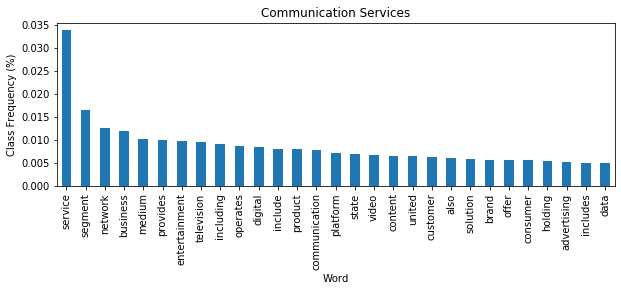

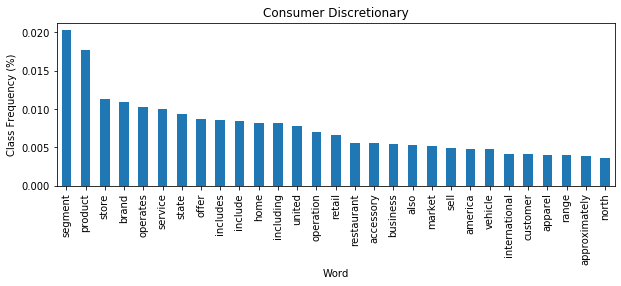

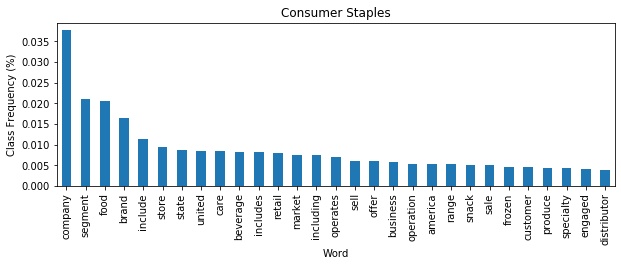

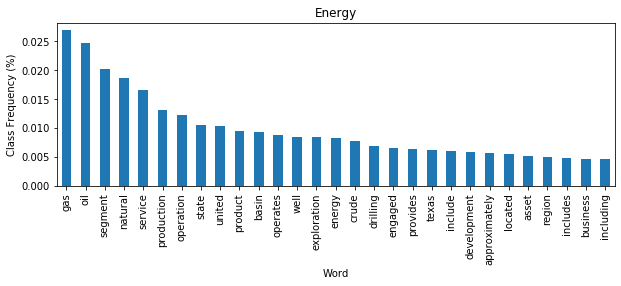

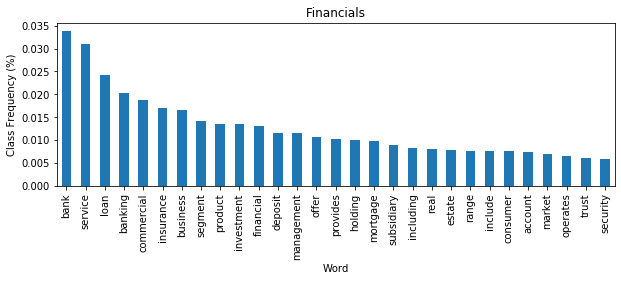

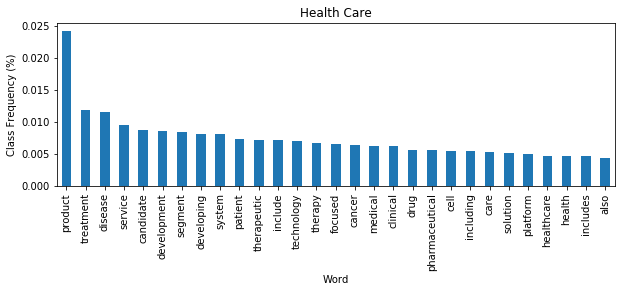

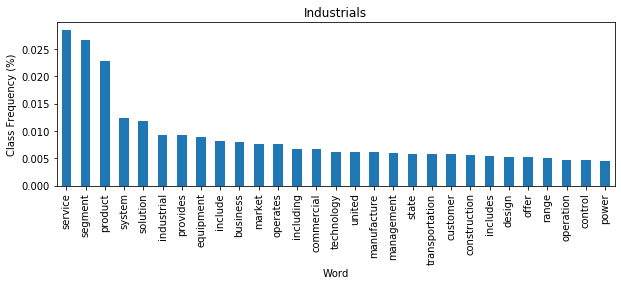

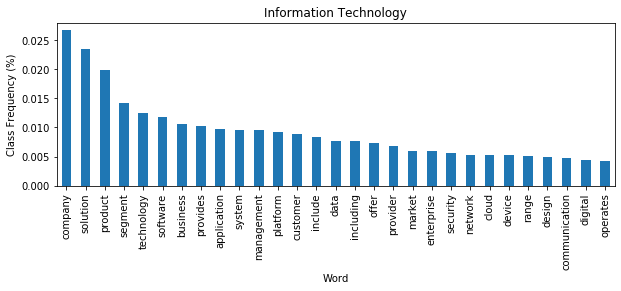

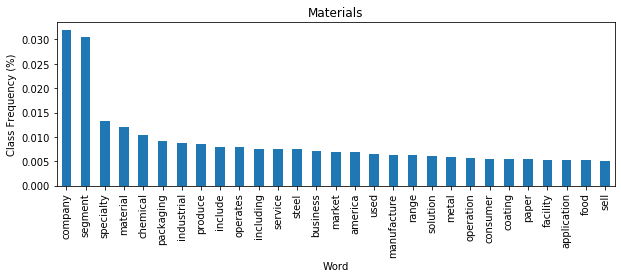

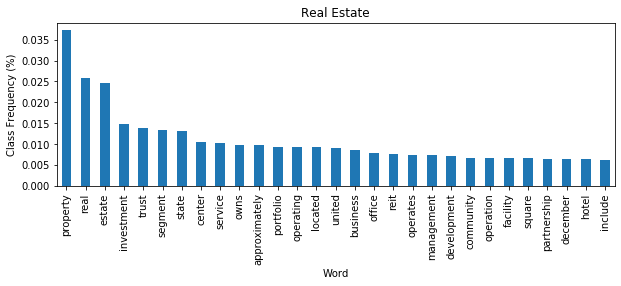

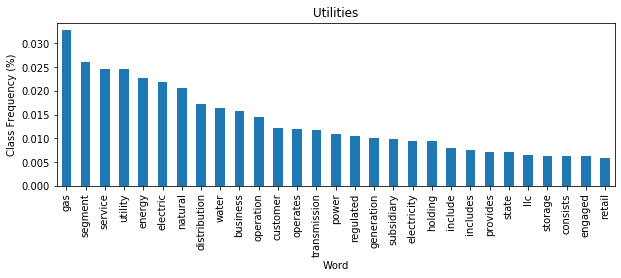

In [54]:
classLabels=wordInClassification.columns

for classLabel in classLabels:
    nlpu.plotWordByClassificationFrequencyPercent(wordByClassificationFrequencyPercent,classLabel,topN=30)


In [55]:
mostCommonWordsInAllClassifications=nlpu.findMostCommonWordsInAllClassifications(wordByClassificationFrequency)

In [80]:
mostCommonWordsInAllClassifications.sort_values(by=['nClassifications','wordFrequencyPercent'],ascending=False).head(20).style

,wordFrequencyPercent,nClassifications
word,,
company,0.034963,11
service,0.020096,11
product,0.018729,11
segment,0.017054,11
business,0.008819,11
include,0.007839,11
solution,0.007180,11
including,0.006932,11
provides,0.006852,11


In [57]:
mostCommonWordsInAllClassifications['nClassifications'].value_counts(normalize=True)

1     0.698461
2     0.124455
3     0.053511
4     0.033762
5     0.025487
6     0.016109
7     0.013019
11    0.009102
8     0.009102
10    0.008606
9     0.008385
Name: nClassifications, dtype: float64

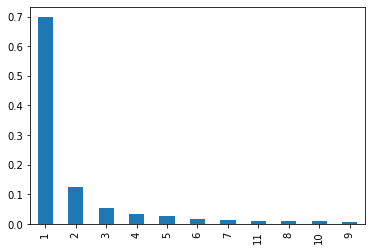

In [58]:
#
mostCommonWordsInAllClassifications['nClassifications'].value_counts(normalize=True).plot(kind='bar')

In [59]:
#
dfTrain['gics_level_1'].value_counts(normalize=True)


Health Care               0.199199
Financials                0.194194
Information Technology    0.125626
Industrials               0.124625
Consumer Discretionary    0.106106
Real Estate               0.062062
Materials                 0.047548
Communication Services    0.041041
Energy                    0.037538
Consumer Staples          0.037037
Utilities                 0.025025
Name: gics_level_1, dtype: float64

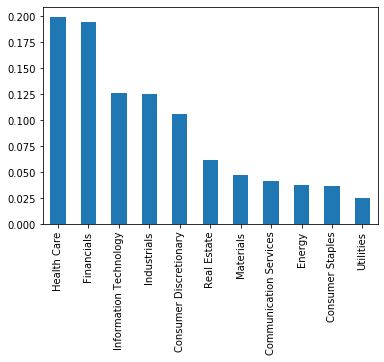

In [60]:
dfTrain['gics_level_1'].value_counts(normalize=True).plot(kind='bar')

In [61]:
#
commonWordIndex=mostCommonWordsInAllClassifications.index[0:100]

In [78]:
wordByClassificationFrequencyPercent.loc[commonWordIndex].head(20).style.format('{:.4%}')

gics_level_1,Communication Services,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Information Technology,Materials,Real Estate,Utilities
word,,,,,,,,,,,
company,3.6373%,3.4381%,3.7618%,3.8742%,3.7281%,3.8280%,2.9074%,2.6659%,3.1902%,3.9671%,5.2280%
service,3.3739%,1.0013%,0.3843%,1.6633%,3.0904%,0.9576%,2.8452%,2.8035%,0.7447%,1.0349%,2.4631%
product,0.8004%,1.7693%,4.2471%,0.9533%,1.3551%,2.4239%,2.2886%,1.9842%,3.5855%,0.1393%,0.1907%
segment,1.6413%,2.0241%,2.1033%,2.0183%,1.4103%,0.8443%,2.6735%,1.4155%,3.0431%,1.3401%,2.6061%
business,1.1955%,0.5419%,0.5663%,0.4665%,1.6576%,0.2200%,0.8053%,1.0639%,0.7171%,0.8491%,1.5732%
include,0.8004%,0.8506%,1.1427%,0.5984%,0.7603%,0.7110%,0.8142%,0.8407%,0.7999%,0.6236%,0.7945%
solution,0.5775%,0.2261%,0.1112%,0.2637%,0.3127%,0.5132%,1.1754%,2.3388%,0.6160%,0.1393%,0.0795%
including,0.9017%,0.8218%,0.7483%,0.4564%,0.8196%,0.5421%,0.6750%,0.7613%,0.7539%,0.4776%,0.3337%
provides,1.0030%,0.3517%,0.1416%,0.6288%,1.0220%,0.3821%,0.9297%,1.0303%,0.3034%,0.2654%,0.7151%


## Model Development, Testing, & Selection

### Bag-of-Words (BoW)

In [63]:
import nltk
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from nltk import metrics
from nltk.classify.util import accuracy

dfDict=dict()
dfDict['train']=dfTrain
dfDict['dev_test']=dfDevTest
dfDict['test']=dfTest

classificationField='gics_level_1'
#outputField='wordsLemmatizedBOBW'
wordType='wordsLemmatizedBOW'

featureSetDict=nlpu.buildFeatureSetsBySplitBOW(dfDict,classificationField,wordType)

# build classifier (no regularization)
classifier = SklearnClassifier(LogisticRegression(penalty='none'))
classifier.train(featureSetDict['train'])

accuracyDict=nlpu.accuracyBySplit(classifier,featureSetDict)

displayDigits=4
predictedClassField='predicted_gics_level_1'
classificationField='gics_level_1'
wordType='wordsLemmatizedBOW'

output=nlpu.addClassBySplit(classifier,dfDict,featureSetDict,predictedClassField,
    classificationField,wordType,displayDigits)

predictionsDict=output['predictionsDict']
confusionMatrixDict=output['confusionMatrixDict']
classificationReportDict=output['classificationReportDict']


In [64]:
accuracyDict['train']

0.9994994994994995

In [65]:
accuracyDict['dev_test']

0.858

In [66]:
#accuracyDict['test']

In [67]:
predictionsDict['train'].head()

,index,business_summary,gics_level_1,words,wordsLemmatized,wordsLemmatizedBOW,wordsLemmatizedBOBW,predicted_gics_level_1
1000,82,"Agilysys, Inc. is a technology company. The Co...",Information Technology,"[agilysys, technology, company, company, provi...","[agilysys, technology, company, company, provi...","{'agilysys': True, 'technology': True, 'compan...","{'agilysys': True, 'technology': True, 'compan...",Information Technology
1001,260,"Air Transport Services Group, Inc. (ATSG) is a...",Industrials,"[air, transport, services, group, atsg, holdin...","[air, transport, service, group, atsg, holding...","{'air': True, 'transport': True, 'service': Tr...","{'air': True, 'transport': True, 'service': Tr...",Industrials
1002,2359,Science Applications International Corporation...,Information Technology,"[science, applications, international, corpora...","[science, application, international, corporat...","{'science': True, 'application': True, 'intern...","{'science': True, 'application': True, 'intern...",Information Technology
1003,2927,"Williams-Sonoma, Inc. is a multi-channel speci...",Consumer Discretionary,"[specialty, retailer, products, home, company,...","[specialty, retailer, product, home, company, ...","{'specialty': True, 'retailer': True, 'product...","{'specialty': True, 'retailer': True, 'product...",Consumer Discretionary
1004,2158,"Power Integrations, Inc. designs, develops and...",Information Technology,"[power, integrations, designs, develops, marke...","[power, integration, design, develops, market,...","{'power': True, 'integration': True, 'design':...","{'power': True, 'integration': True, 'design':...",Information Technology


In [68]:
predictionsDict['dev_test'].head()

,index,business_summary,gics_level_1,words,wordsLemmatized,wordsLemmatizedBOW,wordsLemmatizedBOBW,predicted_gics_level_1
500,105,"Albireo Pharma, Inc., formerly Biodel Inc., is...",Health Care,"[albireo, pharma, formerly, biodel, specialty,...","[albireo, pharma, formerly, biodel, specialty,...","{'albireo': True, 'pharma': True, 'formerly': ...","{'albireo': True, 'pharma': True, 'formerly': ...",Health Care
501,293,"American Express Company, together with its su...",Financials,"[american, express, company, together, subsidi...","[american, express, company, together, subsidi...","{'american': True, 'express': True, 'company':...","{'american': True, 'express': True, 'company':...",Industrials
502,325,"Atreca, Inc. is a biotechnology company. The C...",Health Care,"[atreca, biotechnology, company, company, enga...","[atreca, biotechnology, company, company, enga...","{'atreca': True, 'biotechnology': True, 'compa...","{'atreca': True, 'biotechnology': True, 'compa...",Health Care
503,1911,"Insight Enterprises, Inc. is a global informat...",Information Technology,"[insight, enterprises, global, information, te...","[insight, enterprise, global, information, tec...","{'insight': True, 'enterprise': True, 'global'...","{'insight': True, 'enterprise': True, 'global'...",Information Technology
504,192,Appian Corporation provides a low-code softwar...,Information Technology,"[appian, corporation, provides, software, deve...","[appian, corporation, provides, software, deve...","{'appian': True, 'corporation': True, 'provide...","{'appian': True, 'corporation': True, 'provide...",Information Technology


In [69]:
predictionsDict['train']['gics_level_1'].value_counts()

Health Care               398
Financials                388
Information Technology    251
Industrials               249
Consumer Discretionary    212
Real Estate               124
Materials                  95
Communication Services     82
Energy                     75
Consumer Staples           74
Utilities                  50
Name: gics_level_1, dtype: int64

In [70]:
predictionsDict['train']['gics_level_1'].value_counts(normalize=True)

Health Care               0.199199
Financials                0.194194
Information Technology    0.125626
Industrials               0.124625
Consumer Discretionary    0.106106
Real Estate               0.062062
Materials                 0.047548
Communication Services    0.041041
Energy                    0.037538
Consumer Staples          0.037037
Utilities                 0.025025
Name: gics_level_1, dtype: float64

In [71]:
predictionsDict['dev_test']['gics_level_1'].value_counts()

Health Care               98
Financials                80
Industrials               67
Information Technology    65
Consumer Discretionary    62
Real Estate               40
Energy                    22
Consumer Staples          18
Communication Services    18
Materials                 17
Utilities                 13
Name: gics_level_1, dtype: int64

In [72]:
predictionsDict['dev_test']['gics_level_1'].value_counts(normalize=True)

Health Care               0.196
Financials                0.160
Industrials               0.134
Information Technology    0.130
Consumer Discretionary    0.124
Real Estate               0.080
Energy                    0.044
Consumer Staples          0.036
Communication Services    0.036
Materials                 0.034
Utilities                 0.026
Name: gics_level_1, dtype: float64

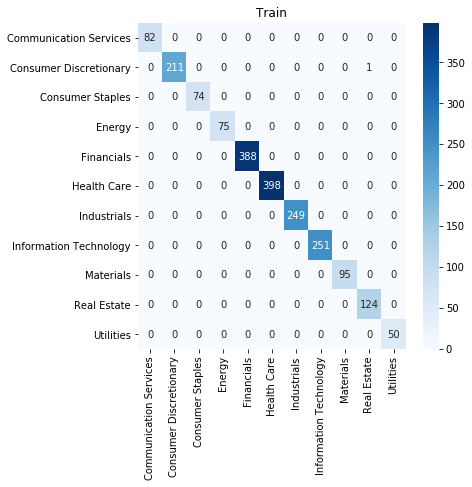

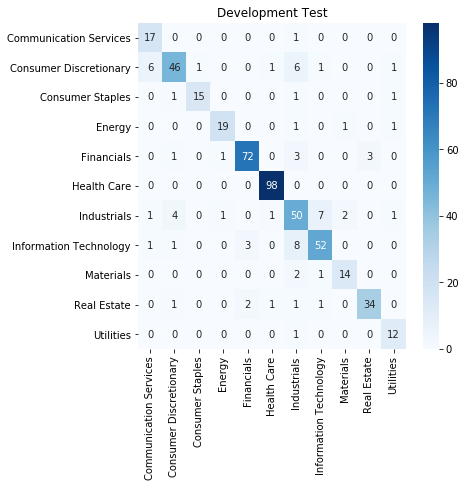

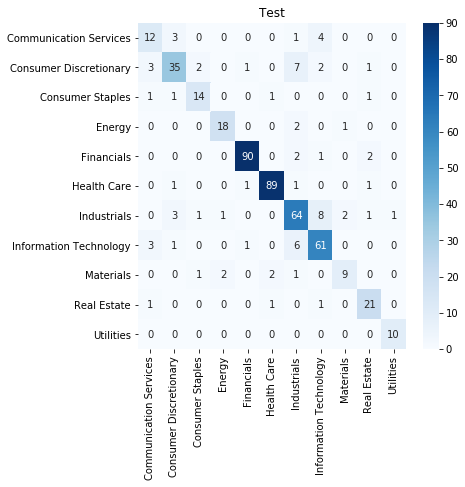

In [73]:
cmap="Blues"

for splitLabel in confusionMatrixDict:
    f = plt.figure(figsize=(6, 6))
    ax = sns.heatmap(confusionMatrixDict[splitLabel], annot=True, fmt="d",cmap=cmap)
    plt.title(splitLabel.title().replace('_',' ').replace('Dev','Development'))


In [74]:
classificationReportDict['train']

,precision,recall,f1-score,support
Communication Services,1.000000,1.000000,1.000000,82.000000
Consumer Discretionary,1.000000,0.995283,0.997636,212.000000
Consumer Staples,1.000000,1.000000,1.000000,74.000000
Energy,1.000000,1.000000,1.000000,75.000000
Financials,1.000000,1.000000,1.000000,388.000000
Health Care,1.000000,1.000000,1.000000,398.000000
Industrials,1.000000,1.000000,1.000000,249.000000
Information Technology,1.000000,1.000000,1.000000,251.000000
Materials,1.000000,1.000000,1.000000,95.000000
Real Estate,0.992000,1.000000,0.995984,124.000000


In [75]:
classificationReportDict['dev_test']

,precision,recall,f1-score,support
Communication Services,0.680000,0.944444,0.790698,18.000
Consumer Discretionary,0.851852,0.741935,0.793103,62.000
Consumer Staples,0.937500,0.833333,0.882353,18.000
Energy,0.904762,0.863636,0.883721,22.000
Financials,0.935065,0.900000,0.917197,80.000
Health Care,0.970297,1.000000,0.984925,98.000
Industrials,0.675676,0.746269,0.709220,67.000
Information Technology,0.838710,0.800000,0.818898,65.000
Materials,0.823529,0.823529,0.823529,17.000
Real Estate,0.918919,0.850000,0.883117,40.000


In [76]:
classificationReportDict['test']

,precision,recall,f1-score,support
Communication Services,0.600000,0.600000,0.600000,20.000
Consumer Discretionary,0.795455,0.686275,0.736842,51.000
Consumer Staples,0.777778,0.777778,0.777778,18.000
Energy,0.857143,0.857143,0.857143,21.000
Financials,0.967742,0.947368,0.957447,95.000
Health Care,0.956989,0.956989,0.956989,93.000
Industrials,0.761905,0.790123,0.775758,81.000
Information Technology,0.792208,0.847222,0.818792,72.000
Materials,0.750000,0.600000,0.666667,15.000
Real Estate,0.777778,0.875000,0.823529,24.000


In the next article, we will test different forms of regularization.